In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

In [2]:
df=pd.read_csv('Train.csv')

In [4]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [5]:
df.shape

(29451, 12)

In [ ]:
df.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [ ]:
df['POSTED_BY'].value_counts()

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64

In [ ]:
df['UNDER_CONSTRUCTION'].value_counts()

0    24157
1     5294
Name: UNDER_CONSTRUCTION, dtype: int64

In [ ]:
df['BHK_OR_RK'].value_counts()

BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64

In [ ]:
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [139]:
cat_features=[features   for features in df.columns   if  (df[features].dtype=='object') | (df[features].nunique()<20)]

In [140]:
cat_features

['POSTED_BY',
 'UNDER_CONSTRUCTION',
 'RERA',
 'BHK_NO.',
 'BHK_OR_RK',
 'READY_TO_MOVE',
 'RESALE',
 'ADDRESS']

In [141]:
num_features=[features for features in df.columns   if features not in cat_features]

In [142]:
num_features

['SQUARE_FT', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)']

### EDA:

### Cat Features

#### Univariate Analysis

POSTED_BY ------------------------------ 3


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


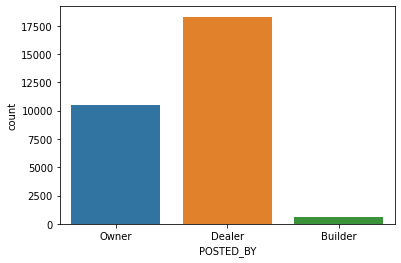

UNDER_CONSTRUCTION ------------------------------ 2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


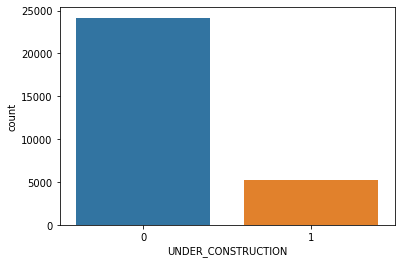

RERA ------------------------------ 2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


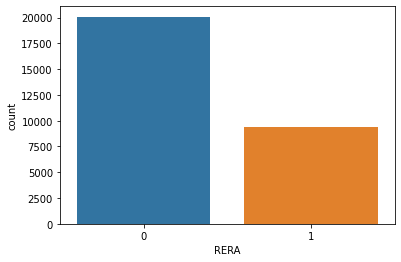

BHK_NO. ------------------------------ 16


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


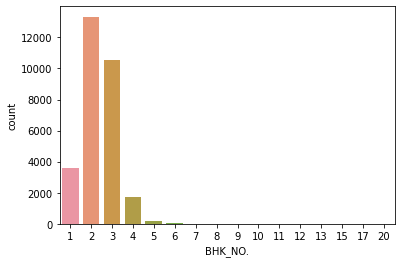

BHK_OR_RK ------------------------------ 2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


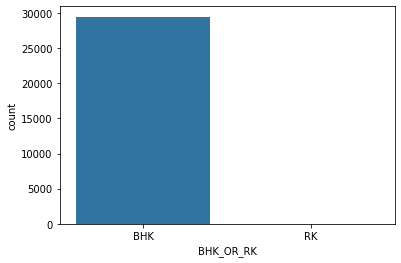

READY_TO_MOVE ------------------------------ 2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


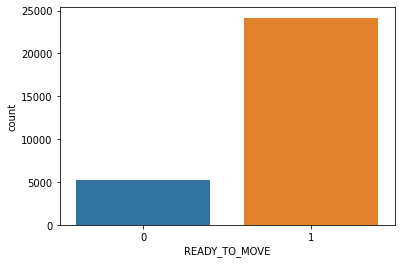

RESALE ------------------------------ 2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


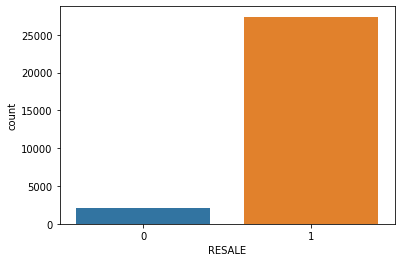

In [ ]:
for features in cat_features:
    if (features !='ADDRESS'):
        print(features,'------------------------------',df[features].nunique())
        sns.countplot(df[features])
        plt.show()

#### Bivariate Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


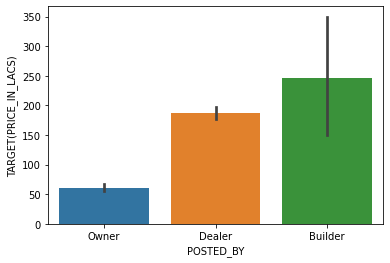

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


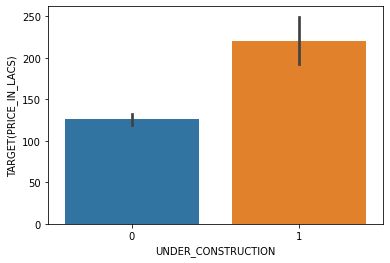

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


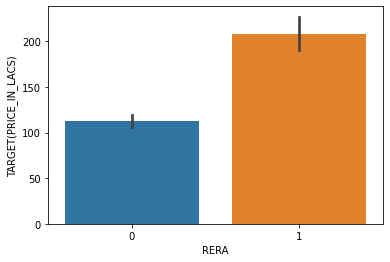

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


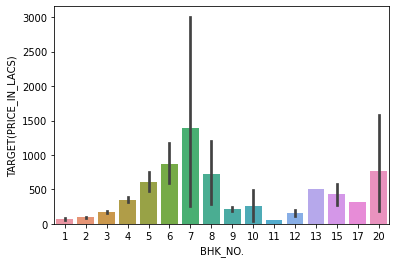

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


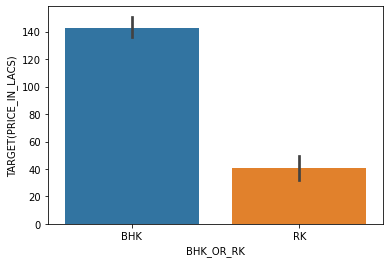

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


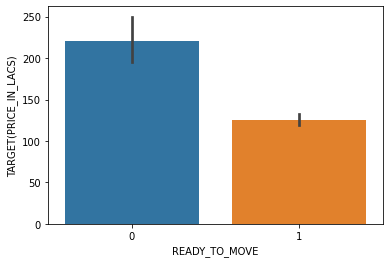

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


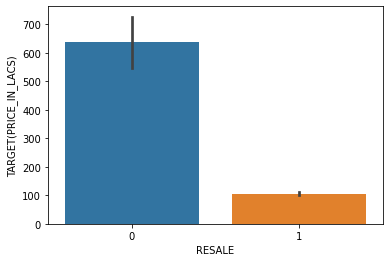

In [ ]:
for features in cat_features:
    if (features !='ADDRESS'):
        sns.barplot(df[features],df['TARGET(PRICE_IN_LACS)'])
        plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


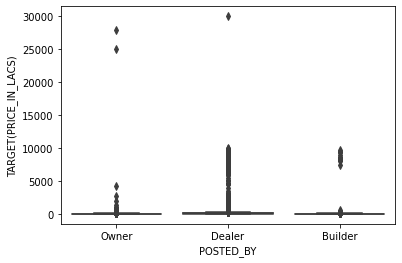

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


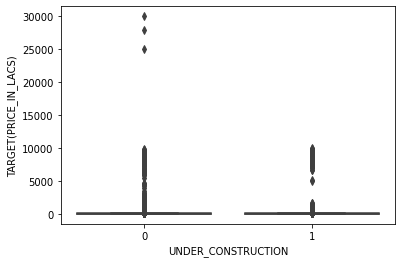

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


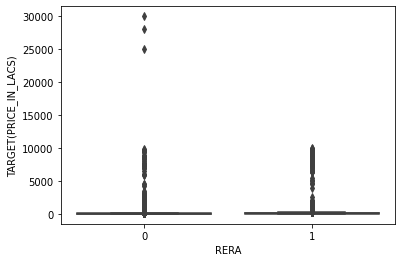

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


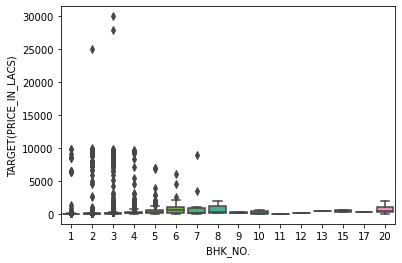

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


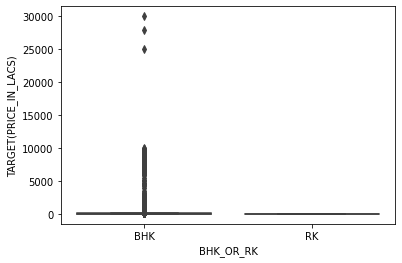

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


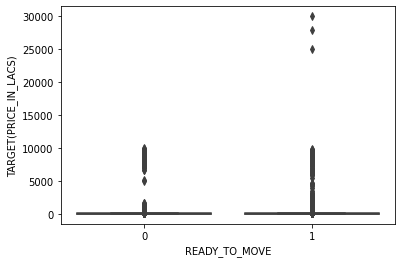

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


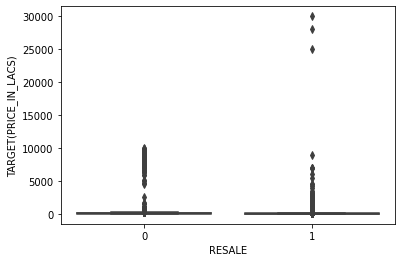

In [143]:
for features in cat_features:
    if (features !='ADDRESS'):
        sns.boxplot(df[features],df['TARGET(PRICE_IN_LACS)'])
        plt.show()

In [ ]:
df.groupby(by='ADDRESS')['TARGET(PRICE_IN_LACS)'].mean().sort_values(ascending=False).head(30)

ADDRESS
Lakkasandra,Bangalore            25000.000000
Malur,Bangalore                  14150.000000
Sector-89 A Gurgaon,Gurgaon       9620.000000
Vishrantwadi,Lalitpur             9480.000000
Ghorpadi,Maharashtra              8450.000000
Deolali Camp,Maharashtra          7420.000000
Shiv Sagar Estate,Maharashtra     6000.000000
Breach Candy,Lalitpur             5294.000000
Kurla (East),Maharashtra          4355.000000
JK Gram,Maharashtra               3714.100000
R.T. Nagar,Bangalore              3416.222222
Tardeo,Mumbai                     3400.000000
Malabar Hill,Lalitpur             3300.000000
JK Gram,Mumbai                    3226.666667
Nariman Point,Lalitpur            3200.000000
Kharadi,Lalitpur                  3178.066667
Jvpd Scheme,Maharashtra           3100.000000
Breach Candy,Mumbai               3050.000000
Walkeshwar,Maharashtra            3000.000000
Brahmand,Mumbai                   2998.666667
Ghorpadi,Pune                     2853.666667
Atlas More,Kolkata        

### Num Features

#### Univariate Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


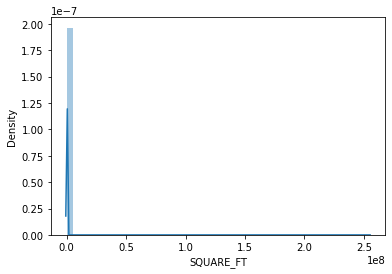

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


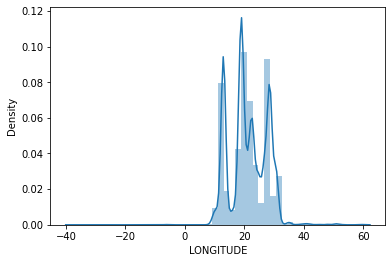

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


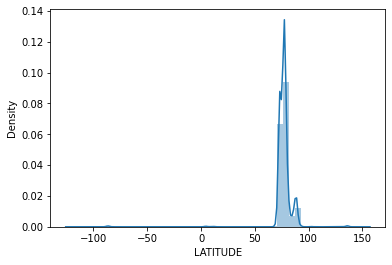

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


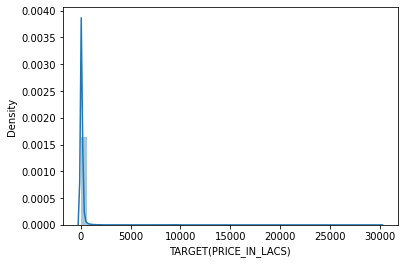

In [ ]:
for features in num_features:
    sns.distplot(df[features])
    plt.show()

#### Bivariate Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


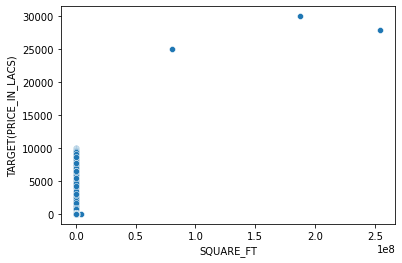

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


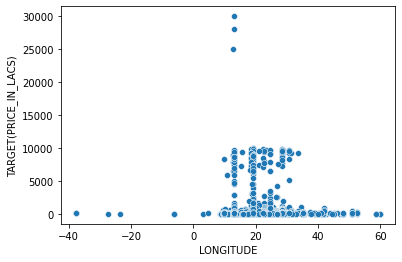

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


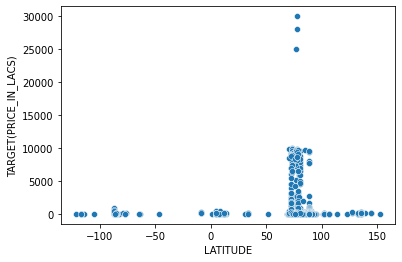

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


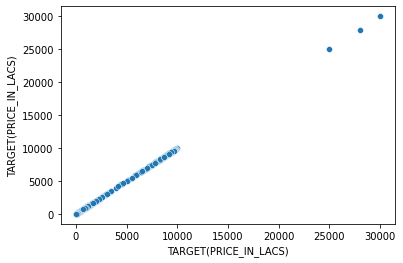

In [ ]:
for features in num_features:
    sns.scatterplot(df[features],df['TARGET(PRICE_IN_LACS)'])
    plt.show()

In [ ]:
df['SQUARE_FT'].nunique()

19561

### Feature Engineering

In [ ]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


#### Num Features

In [106]:
df['SQUARE_FT']=round(df['SQUARE_FT'])

In [107]:
df['SQUARE_FT'].nunique()

3155

In [124]:
df.loc[df['SQUARE_FT']==10.00]

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
26485,Owner,0,0,1,BHK,10.0,1,1,"Punagam,Surat",21.21663,72.899374,8.0


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


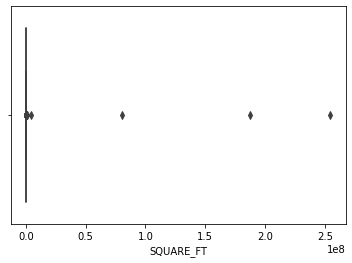

In [126]:
sns.boxplot(df['SQUARE_FT'])

#### Cat columns

In [ ]:
cat_features

['POSTED_BY',
 'UNDER_CONSTRUCTION',
 'RERA',
 'BHK_NO.',
 'BHK_OR_RK',
 'READY_TO_MOVE',
 'RESALE',
 'ADDRESS']

In [ ]:
df['POSTED_BY'].value_counts()

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64

In [ ]:
df['UNDER_CONSTRUCTION'].value_counts()

0    24157
1     5294
Name: UNDER_CONSTRUCTION, dtype: int64

In [ ]:
df['RERA'].value_counts()

0    20088
1     9363
Name: RERA, dtype: int64

In [ ]:
df['BHK_OR_RK'].value_counts()

BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64

In [ ]:
df['READY_TO_MOVE'].value_counts()

1    24157
0     5294
Name: READY_TO_MOVE, dtype: int64

In [ ]:
df['RESALE'].value_counts()

1    27377
0     2074
Name: RESALE, dtype: int64

In [ ]:
# Encoding can be done later

In [ ]:
df['BHK_NO.'].value_counts()

2     13324
3     10546
1      3574
4      1723
5       190
6        52
7        11
8        10
15        4
10        4
20        4
12        3
9         3
13        1
11        1
17        1
Name: BHK_NO., dtype: int64

In [3]:
# Since more than 4 BHK_NO is very much lesser we can combine it to seperate category as others.
df['BHK_NO_ENC']=df['BHK_NO.'].apply(lambda x:'others' if x>=7 else x)

In [4]:
df['BHK_NO_ENC'].value_counts()

2         13324
3         10546
1          3574
4          1723
5           190
6            52
others       42
Name: BHK_NO_ENC, dtype: int64

In [5]:
df['BHK_NO_ENC']=df['BHK_NO_ENC'].astype(str)

In [6]:
df.drop('BHK_NO.',axis=1,inplace=True)

In [9]:
df['ADDRESS'].value_counts()

Zirakpur,Chandigarh              509
Whitefield,Bangalore             230
Raj Nagar Extension,Ghaziabad    215
Sector-137 Noida,Noida           139
New Town,Kolkata                 131
                                ... 
AKASH GANGA WAGHBIL,Mumbai         1
Nethaji Nagar,Pondicherry          1
Mhow,Indore                        1
Jameen Pallavaram,Chennai          1
Jivaraj Park,Rajkot                1
Name: ADDRESS, Length: 6899, dtype: int64

In [7]:
df['area']=df.ADDRESS.apply(lambda x: pd.Series(str(x).split(",")))[0]

In [8]:
df['city']=df.ADDRESS.apply(lambda x: pd.Series(str(x).split(",")))[1]
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),BHK_NO_ENC,area,city
0,Owner,0,0,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,2,Ksfc Layout,Bangalore
1,Dealer,0,0,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,2,Vishweshwara Nagar,Mysore
2,Owner,0,0,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,2,Jigani,Bangalore
3,Owner,0,1,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,2,Sector-1 Vaishali,Ghaziabad
4,Dealer,1,0,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,2,New Town,Kolkata


In [9]:
df.drop(columns=['ADDRESS'],inplace=True)

In [211]:
df['area'].nunique()

5884

In [212]:
df.groupby('city').mean()['TARGET(PRICE_IN_LACS)'].sort_values(ascending=False)

city
 pudupalayam                     650.000000
 haudin road                     530.000000
Gurgaon                          390.591395
Vidisha                          320.000000
Maharashtra                      310.662921
                                    ...    
Bhuj                              10.500000
karjat                            10.000000
 Near District Hospital Korba      8.500000
Pali                               7.400000
Bankura                            5.300000
Name: TARGET(PRICE_IN_LACS), Length: 433, dtype: float64

In [255]:
df['city'].value_counts().reset_index().iloc[:,1]

0      4319
1      2987
2      2020
3      1984
4      1765
       ... 
428       1
429       1
430       1
431       1
432       1
Name: city, Length: 433, dtype: int64

In [10]:
top_city=list(df['city'].value_counts().reset_index()[df['city'].value_counts().reset_index().iloc[:,1]>1000]['index'])

In [11]:
top_city

['Bangalore',
 'Lalitpur',
 'Mumbai',
 'Pune',
 'Noida',
 'Kolkata',
 'Maharashtra',
 'Chennai',
 'Ghaziabad']

In [12]:
df['top_city']=df['city'].apply(lambda x:x if x in top_city else 'minor_city')

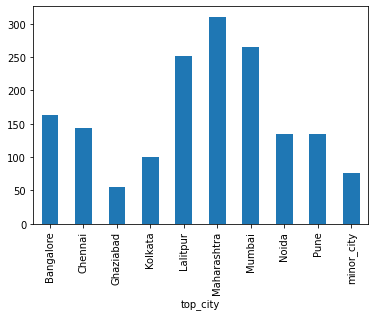

In [217]:
df.groupby(by='top_city')['TARGET(PRICE_IN_LACS)'].mean().plot(kind='bar')

In [ ]:
# since the city feature is having lot of counts with less variance we can drop both city and area

In [ ]:
num_features

['SQUARE_FT', 'LONGITUDE', 'LATITUDE', 'TARGET(PRICE_IN_LACS)']

In [ ]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),BHK_NO_ENC,area,city
0,Owner,0,0,BHK,1300.236407,1,1,12.969910,77.597960,55.0,2,Ksfc Layout,Bangalore
1,Dealer,0,0,BHK,1275.000000,1,1,12.274538,76.644605,51.0,2,Vishweshwara Nagar,Mysore
2,Owner,0,0,BHK,933.159722,1,1,12.778033,77.632191,43.0,2,Jigani,Bangalore
3,Owner,0,1,BHK,929.921143,1,1,28.642300,77.344500,62.5,2,Sector-1 Vaishali,Ghaziabad
4,Dealer,1,0,BHK,999.009247,0,1,22.592200,88.484911,60.5,2,New Town,Kolkata


In [13]:
df_ad_rem=df.drop(columns=['area','city'])

In [17]:
df_ad_rem.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),BHK_NO_ENC,top_city
0,Owner,0,0,BHK,1300.236407,1,1,12.969910,77.597960,55.0,2,Bangalore
1,Dealer,0,0,BHK,1275.000000,1,1,12.274538,76.644605,51.0,2,minor_city
2,Owner,0,0,BHK,933.159722,1,1,12.778033,77.632191,43.0,2,Bangalore
3,Owner,0,1,BHK,929.921143,1,1,28.642300,77.344500,62.5,2,Ghaziabad
4,Dealer,1,0,BHK,999.009247,0,1,22.592200,88.484911,60.5,2,Kolkata


In [ ]:
df_ad_rem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_OR_RK              29451 non-null  object 
 4   SQUARE_FT              29451 non-null  float64
 5   READY_TO_MOVE          29451 non-null  int64  
 6   RESALE                 29451 non-null  int64  
 7   LONGITUDE              29451 non-null  float64
 8   LATITUDE               29451 non-null  float64
 9   TARGET(PRICE_IN_LACS)  29451 non-null  float64
 10  BHK_NO_ENC             29451 non-null  object 
dtypes: float64(4), int64(4), object(3)
memory usage: 2.5+ MB


In [14]:
df_encoded=pd.get_dummies(df_ad_rem,drop_first=True)

In [23]:
df_encoded.head()

,UNDER_CONSTRUCTION,RERA,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK,BHK_NO_ENC_2,BHK_NO_ENC_3,BHK_NO_ENC_4,BHK_NO_ENC_5,BHK_NO_ENC_6,BHK_NO_ENC_others,top_city_Chennai,top_city_Ghaziabad,top_city_Kolkata,top_city_Lalitpur,top_city_Maharashtra,top_city_Mumbai,top_city_Noida,top_city_Pune,top_city_minor_city
0,0,0,1300.236407,1,1,12.969910,77.597960,55.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1275.000000,1,1,12.274538,76.644605,51.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,933.159722,1,1,12.778033,77.632191,43.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,929.921143,1,1,28.642300,77.344500,62.5,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,999.009247,0,1,22.592200,88.484911,60.5,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
df_encoded.corr()

,UNDER_CONSTRUCTION,RERA,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,POSTED_BY_Owner,BHK_OR_RK_RK,BHK_NO_ENC_2,BHK_NO_ENC_3,BHK_NO_ENC_4,BHK_NO_ENC_others
UNDER_CONSTRUCTION,1.000000,0.363826,-0.004204,-1.000000,-0.347405,0.006440,-0.000381,0.055399,0.168987,-0.227133,0.020719,-0.004810,-0.021710,-0.000648,-0.027192
RERA,0.363826,1.000000,-0.006229,-0.363826,-0.270351,0.104976,-0.065106,0.067636,0.236575,-0.273075,0.006056,-0.036176,0.019807,0.035178,-0.030061
SQUARE_FT,-0.004204,-0.006229,1.000000,0.004204,0.001732,-0.012591,0.000803,0.402685,-0.005032,0.005457,-0.000292,-0.005913,0.009822,-0.002051,-0.000785
READY_TO_MOVE,-1.000000,-0.363826,0.004204,1.000000,0.347405,-0.006440,0.000381,-0.055399,-0.168987,0.227133,-0.020719,0.004810,0.021710,0.000648,0.027192
RESALE,-0.347405,-0.270351,0.001732,0.347405,1.000000,0.024038,0.014844,-0.207378,-0.039368,0.198531,-0.029346,0.034743,0.017071,-0.037695,0.008148
LONGITUDE,0.006440,0.104976,-0.012591,-0.006440,0.024038,1.000000,-0.155062,-0.031112,0.071516,-0.062615,0.009095,-0.073760,0.062648,0.055574,0.005988
LATITUDE,-0.000381,-0.065106,0.000803,0.000381,0.014844,-0.155062,1.000000,-0.017254,-0.026285,0.026967,0.000303,0.003205,0.043747,-0.003917,-0.001412
TARGET(PRICE_IN_LACS),0.055399,0.067636,0.402685,-0.055399,-0.207378,-0.031112,-0.017254,1.000000,0.085513,-0.093437,-0.004429,-0.063269,0.038012,0.078905,0.079222
POSTED_BY_Dealer,0.168987,0.236575,-0.005032,-0.168987,-0.039368,0.071516,-0.026285,0.085513,1.000000,-0.955621,0.007590,-0.095775,0.066606,0.090931,0.014050
POSTED_BY_Owner,-0.227133,-0.273075,0.005457,0.227133,0.198531,-0.062615,0.026967,-0.093437,-0.955621,1.000000,-0.018835,0.096984,-0.064049,-0.090096,-0.010597


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UNDER_CONSTRUCTION     29451 non-null  int64  
 1   RERA                   29451 non-null  int64  
 2   SQUARE_FT              29451 non-null  float64
 3   READY_TO_MOVE          29451 non-null  int64  
 4   RESALE                 29451 non-null  int64  
 5   LONGITUDE              29451 non-null  float64
 6   LATITUDE               29451 non-null  float64
 7   TARGET(PRICE_IN_LACS)  29451 non-null  float64
 8   POSTED_BY_Dealer       29451 non-null  uint8  
 9   POSTED_BY_Owner        29451 non-null  uint8  
 10  BHK_OR_RK_RK           29451 non-null  uint8  
 11  BHK_NO_ENC_2           29451 non-null  uint8  
 12  BHK_NO_ENC_3           29451 non-null  uint8  
 13  BHK_NO_ENC_4           29451 non-null  uint8  
 14  BHK_NO_ENC_others      29451 non-null  uint8  
dtypes:

# Linear Regression

In [221]:
import pandas.util.testing as tm
import statsmodels.api as sm
x=df_encoded.drop(columns=['TARGET(PRICE_IN_LACS)'])
y=df_encoded['TARGET(PRICE_IN_LACS)']
xc=sm.add_constant(x)
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     TARGET(PRICE_IN_LACS)   R-squared:                       0.242
Model:                               OLS   Adj. R-squared:                  0.242
Method:                    Least Squares   F-statistic:                     392.0
Date:                   Sun, 18 Oct 2020   Prob (F-statistic):               0.00
Time:                           09:42:23   Log-Likelihood:            -2.2877e+05
No. Observations:                  29451   AIC:                         4.576e+05
Df Residuals:                      29426   BIC:                         4.578e+05
Df Model:                             24                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  152.0516     26.877      5.657      0.000      99.371     204.732
UNDER_CONSTRUCTION      56.5285     14.323      3.947      0.000      28.455      84.602
RERA                    -3.9983      8.268     -0.484      0.629     -20.204      12.207
SQUARE_FT                0.0001   1.75e-06     79.259      0.000       0.000       0.000
READY_TO_MOVE           95.5231     14.298      6.681      0.000      67.499     123.547
RESALE                -675.9691     16.508    -40.947      0.000    -708.327    -643.612
LONGITUDE               -2.0363      0.787     -2.587      0.010      -3.579      -0.493
LATITUDE                -0.4602      0.340     -1.353      0.176      -1.127       0.207
POSTED_BY_Dealer       498.6542     27.513     18.124      0.000     444.727     552.581
POSTED_BY_Owner        485.2615     28.293     17.151      0.000     429.806     540.717
BHK_OR_RK_RK          -169.5290    117.599     -1.442      0.149    -400.027      60.969
BHK_NO_ENC_2            76.8937     11.020      6.978      0.000      55.294      98.493
BHK_NO_ENC_3           160.8820     11.637     13.825      0.000     138.073     183.691
BHK_NO_ENC_4           304.5139     17.259     17.643      0.000     270.685     338.343
BHK_NO_ENC_5           564.1808     42.740     13.200      0.000     480.409     647.952
BHK_NO_ENC_6           834.5329     79.945     10.439      0.000     677.837     991.229
BHK_NO_ENC_others      748.6742     88.871      8.424      0.000     574.483     922.865
top_city_Chennai       -22.5234     18.629     -1.209      0.227     -59.037      13.991
top_city_Ghaziabad     -33.1875     22.536     -1.473      0.141     -77.359      10.985
top_city_Kolkata       -26.2351     18.529     -1.416      0.157     -62.553      10.083
top_city_Lalitpur      121.7308     15.562      7.822      0.000      91.228     152.233
top_city_Maharashtra   112.6937     17.886      6.301      0.000      77.636     147.752
top_city_Mumbai        121.0460     16.679      7.257      0.000      88.354     153.738
top_city_Noida          10.1861     19.729      0.516      0.606     -28.484      48.857
top_city_Pune           24.0687     16.230      1.483      0.138      -7.744      55.881
top_city_minor_city    -46.0423     13.004     -3.541      0.000     -71.531     -20.553
==============================================================================
Omnibus:                    50779.703   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         39543766.620
Skew:                          12.309   Prob(JB):                         0.00
Kurtosis:                     180.817   Cond. No.                     2.27e+16
==========================================================================

In [222]:
x=df_encoded.drop(columns=['TARGET(PRICE_IN_LACS)'])
y=df_encoded['TARGET(PRICE_IN_LACS)']

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0,test_size=0.2)

pipelr=Pipeline((
    ("pt",PowerTransformer()),
    ("sc", StandardScaler()),
    #("rfe",RFE(estimator=LinearRegression(),n_features_to_select=7)),
    ("lr", LinearRegression())
))

pipelr.fit(xtrain,ytrain)
ypred_train=np.abs(pipelr.predict(xtrain))
ypred_test=np.abs(pipelr.predict(xtest))

print("Testing Accuracy R2 score")
print(pipelr.score(xtest,ytest))
print("Training Accuracy R2 score")
print(pipelr.score(xtrain,ytrain))

print("Testing Accuracy RMSLE score")
print(np.sqrt(mean_squared_log_error(ytest,ypred_test)))
print("Training Accuracy RMSLE score")
print(np.sqrt(mean_squared_log_error( ytrain,ypred_train)))

Testing Accuracy R2 score
0.32909464899978313
Training Accuracy R2 score
0.3657772931728158
Testing Accuracy RMSLE score
1.3916704211850799
Training Accuracy RMSLE score
1.3912357057002067


# Gradient Boost Regressor

In [223]:
x=df_encoded.drop(columns=['TARGET(PRICE_IN_LACS)'])
y=df_encoded['TARGET(PRICE_IN_LACS)']

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectKBest

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0,test_size=0.2)

pipex=Pipeline((
    ("pt",PowerTransformer()),
    ("sc", StandardScaler()),
    #("skb",SelectKBest(f_classif,k=5)),
    ("gbr", GradientBoostingRegressor(random_state=0))
))

pipex.fit(xtrain,ytrain)
ypred_train=np.abs(pipex.predict(xtrain))
ypred_test=np.abs(pipex.predict(xtest))

print("Testing Accuracy R2 score")
print(pipex.score(xtest,ytest))
print("Training Accuracy R2 score")
print(pipex.score(xtrain,ytrain))

print("Testing Accuracy RMSLE score")
print(np.sqrt(mean_squared_log_error(ytest,ypred_test)))
print("Training Accuracy RMSLE score")
print(np.sqrt(mean_squared_log_error( ytrain,ypred_train)))

Testing Accuracy R2 score
0.9605214374359651
Training Accuracy R2 score
0.9754847457141623
Testing Accuracy RMSLE score
0.4520401179479039
Training Accuracy RMSLE score
0.44807452349147764


In [ ]:
from sklearn.model_selection import GridSearchCV
param=[{'n_estimators':np.arange(1,100)}]
grid=GridSearchCV(estimator=GradientBoostingRegressor(random_state=0),param_grid=param,scoring='r2',cv=5)

In [ ]:
grid.fit(xtrain,ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...
             param_grid=[{'n

In [ ]:
grid.best_params_

{'n_estimators': 99}

# Bagging Regressor (good)

In [15]:
x=df_encoded.drop(columns=['TARGET(PRICE_IN_LACS)'])
y=df_encoded['TARGET(PRICE_IN_LACS)']

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor 
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectKBest

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0,test_size=0.2)

pipex=Pipeline((
    ("pt",PowerTransformer()),
    ("sc", StandardScaler()),
    #("rfe",RFE(LinearRegression(),n_features_to_select=5)),
    ("gbr", BaggingRegressor(random_state=0,n_estimators=280))
))

pipex.fit(xtrain,ytrain)
ypred_train=np.abs(pipex.predict(xtrain))
ypred_test=np.abs(pipex.predict(xtest))

print("Testing Accuracy R2 score")
print(pipex.score(xtest,ytest))
print("Training Accuracy R2 score")
print(pipex.score(xtrain,ytrain))

print("Testing Accuracy RMSLE score")
print(np.sqrt(mean_squared_log_error(ytest,ypred_test)))
print("Training Accuracy RMSLE score")
print(np.sqrt(mean_squared_log_error( ytrain,ypred_train)))

Testing Accuracy R2 score
0.957808792938789
Training Accuracy R2 score
0.9926686763787982
Testing Accuracy RMSLE score
0.3551324859379495
Training Accuracy RMSLE score
0.16561192733644195


In [22]:
from sklearn.model_selection import cross_val_score

In [230]:
# Parameter Tuning
be=[]
ve=[]
for i in [5,10,20,40,60,80,100,120,150,200,250]:
    #for j in [10,15,20,30]:
    dt=BaggingRegressor(n_estimators=i,random_state=0)
    #scorer = make_scorer(f1_score, average = 'weighted')
    score=cross_val_score(dt,xtrain,ytrain,cv=5,scoring='neg_mean_squared_log_error')
    print('n_estimator:',i)
    print('Bias Error',np.mean(np.sqrt(np.abs(score))))
    print('Variance Error',np.std(np.sqrt(np.abs(score)))/np.mean(np.sqrt(np.abs(score))))
    be.append(np.mean(np.sqrt(np.abs(score))))
    ve.append(np.std(np.sqrt(np.abs(score)))/np.mean(np.sqrt(np.abs(score))))

n_estimator: 5
Bias Error 0.38469751585079753
Variance Error 0.021191994552563688
n_estimator: 10
Bias Error 0.3743732927017064
Variance Error 0.029369689101714728
n_estimator: 20
Bias Error 0.3682603335143383
Variance Error 0.03124651423884181
n_estimator: 40
Bias Error 0.3652044593009486
Variance Error 0.033592134678574186
n_estimator: 60
Bias Error 0.3639607118523704
Variance Error 0.033534639135773835
n_estimator: 80
Bias Error 0.363257657341929
Variance Error 0.031850723437828576
n_estimator: 100
Bias Error 0.36357085540921624
Variance Error 0.030369896817206102
n_estimator: 120
Bias Error 0.3632236986146843
Variance Error 0.029592331523327645
n_estimator: 150
Bias Error 0.3628877845574145
Variance Error 0.031382048456002676
n_estimator: 200
Bias Error 0.36183356577536074
Variance Error 0.031389774376519325
n_estimator: 250
Bias Error 0.3615752670906975
Variance Error 0.030669597385948082


In [232]:
be1=pd.DataFrame(be)/pd.DataFrame(be).sum()
ve1=pd.DataFrame(ve)/pd.DataFrame(ve).sum()

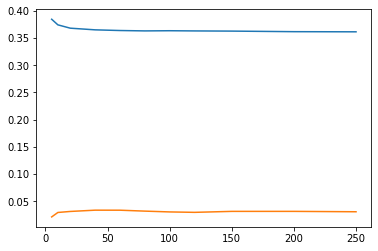

In [234]:
plt.plot([5,10,20,40,60,80,100,120,150,200,250],be)
plt.plot([5,10,20,40,60,80,100,120,150,200,250],ve)

# Stacking Regressor

In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor,StackingRegressor

x=df_encoded.drop(columns=['TARGET(PRICE_IN_LACS)'])
y=df_encoded['TARGET(PRICE_IN_LACS)']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0,test_size=0.2)


dt_full=BaggingRegressor(random_state=0,n_estimators=165)
rf = RandomForestRegressor(n_estimators=51,random_state=0)
ab = AdaBoostRegressor(base_estimator=rf,n_estimators=51,random_state=0)
gb = GradientBoostingRegressor(n_estimators=90,random_state=0)


#sc = StackingClassifier(estimators = [('ab',ab),('rf',rf),('gb', gb)], final_estimator=dt_full)

pipex=Pipeline((
    ("pt",PowerTransformer()),
    ("sc", StandardScaler()),
    #("rfe",RFE(LinearRegression(),n_features_to_select=5)),
    ("sr", StackingRegressor(estimators = [('ab',ab),('rf',rf),('gb', gb)], final_estimator=dt_full))
))

pipex.fit(xtrain,ytrain)
ypred_train=np.abs(pipex.predict(xtrain))
ypred_test=np.abs(pipex.predict(xtest))

print("Testing Accuracy R2 score")
print(pipex.score(xtest,ytest))
print("Training Accuracy R2 score")
print(pipex.score(xtrain,ytrain))

print("Testing Accuracy RMSLE score")
print(np.sqrt(mean_squared_log_error(ytest,ypred_test)))
print("Training Accuracy RMSLE score")
print(np.sqrt(mean_squared_log_error( ytrain,ypred_train)))

Testing Accuracy R2 score
0.7514031256293506
Training Accuracy R2 score
0.8897231233657754
Testing Accuracy RMSLE score
0.41364930118492277
Training Accuracy RMSLE score
0.2652683558165292


In [97]:
x=df_encoded.drop(columns=['TARGET(PRICE_IN_LACS)'])
y=df_encoded['TARGET(PRICE_IN_LACS)']

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor 
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectKBest

xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0,test_size=0.2)

pipex=Pipeline((
    ("pt",PowerTransformer()),
    ("sc", StandardScaler()),
    #("rfe",RFE(LinearRegression(),n_features_to_select=5)),
    ("xgb", XGBRegressor(random_state=0))
))

pipex.fit(xtrain,ytrain)
ypred_train=np.abs(pipex.predict(xtrain))
ypred_test=np.abs(pipex.predict(xtest))

print("Testing Accuracy R2 score")
print(pipex.score(xtest,ytest))
print("Training Accuracy R2 score")
print(pipex.score(xtrain,ytrain))

print("Testing Accuracy RMSLE score")
print(np.sqrt(mean_squared_log_error(ytest,ypred_test)))
print("Training Accuracy RMSLE score")
print(np.sqrt(mean_squared_log_error( ytrain,ypred_train)))

[06:47:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Testing Accuracy R2 score
0.9641559803404453
Training Accuracy R2 score
0.9914124839289604
Testing Accuracy RMSLE score
0.4410285970843282
Training Accuracy RMSLE score
0.41552367465375756


In [160]:
from sklearn.model_selection import cross_val_score,KFold
msle=cross_val_score(BaggingRegressor(random_state=0,n_estimators=165),x,y,cv=3,scoring='neg_mean_squared_log_error')
rmsle=np.sqrt(np.abs(msle))
np.mean(rmsle),np.std(rmsle,ddof=1)

(0.3857574548187561, 0.013322318538107433)

In [41]:
from google.colab import files
uploaded = files.upload()

Saving Test.csv to Test.csv


In [16]:
df_test=pd.read_csv('Test.csv')

In [17]:
df_test['BHK_NO_ENC']=df_test['BHK_NO.'].apply(lambda x:'others' if x>=7 else x)
df_test['BHK_NO_ENC']=df_test['BHK_NO_ENC'].astype(str)
df_test.drop('BHK_NO.',axis=1,inplace=True)

In [18]:
df_test['area']=df_test.ADDRESS.apply(lambda x: pd.Series(str(x).split(",")))[0]


In [19]:
df_test['city']=df_test.ADDRESS.apply(lambda x: pd.Series(str(x).split(",")))[1]

In [20]:
df_test['top_city']=df_test['city'].apply(lambda x:x if x in top_city else 'minor_city')
df_ad_rem_test=df_test.drop(columns=['area','city'])


In [21]:
df_encoded_test=pd.get_dummies(df_ad_rem_test,drop_first=True)

In [ ]:
ypredtrain=np.abs(pipex.predict(df_encoded_test))

In [78]:
file1=pd.DataFrame(ypredtrain,columns=['TARGET(PRICE_IN_LACS)'])

In [79]:
file1.to_csv('sample_submission.csv', index=False)

In [245]:
df_encoded_test.shape

(68720, 31)

In [80]:
files.download('sample_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>